In [0]:
%tensorflow_version 2.x

In [0]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf

In [0]:
from tensorflow.keras.datasets import fashion_mnist

#1.讀入數據集

In [0]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

In [0]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

#2.檢視數據集內容

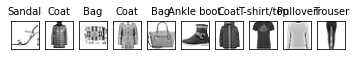

In [6]:
pick = np.random.choice(60000, 10, replace=False)

for i in range(10):
    n = pick[i]
    ax = plt.subplot(1,10,i+1)
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_title(class_names[y_train[n]], fontsize=10)
    plt.imshow(x_train[n], cmap='Greys')

In [7]:
x_train.shape

(60000, 28, 28)

In [8]:
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
          0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,
          1,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
          0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,
          0,   3],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,
          0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,
         10,   0],
       [  

In [9]:
y_train[0]


9

#3.資料標準化

In [0]:
x_train = x_train.reshape(60000, 28, 28, 1)/255
x_test = x_test.reshape(10000, 28, 28, 1)/255

In [0]:
from tensorflow.keras.utils import to_categorical

In [0]:
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

#4.打造CNN神經網路

####fitler改成100,200,400
####Convolution layer大小改成4x4
####兩層隱藏層，分別有50, 100個神經元，激活函數使用relu
####一層輸出層，有10個神經元，激活函數使用softmax

In [0]:
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.optimizers import SGD

In [0]:
model = Sequential()

In [0]:
model.add(Conv2D(100,(4,4),padding='same',
         input_shape=(28,28,1),
         activation='relu'))

In [0]:
model.add(MaxPooling2D(pool_size=(2,2)))

In [0]:
model.add(Conv2D(200,(4,4),padding='same',
                activation='relu'))

In [0]:
model.add(MaxPooling2D(pool_size=(2,2)))

In [0]:
model.add(Conv2D(400,(4,4),padding='same',
                activation='relu'))

In [0]:
model.add(MaxPooling2D(pool_size=(2,2)))

In [0]:
model.add(Flatten())

In [0]:
model.add(Dense(50,activation='relu'))

In [0]:
model.add(Dense(100,activation='relu'))

In [0]:
model.add(Dense(10,activation='softmax'))

In [25]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 100)       1700      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 100)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 200)       320200    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 200)         0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 7, 7, 400)         1280400   
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 3, 3, 400)         0         
_________________________________________________________________
flatten (Flatten)            (None, 3600)              0

####learning rate改為0.08

In [0]:
model.compile(loss='mse', optimizer=SGD(lr=0.08), metrics=['accuracy'])

####每次訓練100筆資料，訓練20次

In [27]:
final = model.fit(x_train, y_train, batch_size=100, epochs=20)

Epoch 1/20
600/600 [==============================] - 20s 33ms/step - loss: 0.0896 - accuracy: 0.1985
Epoch 2/20
600/600 [==============================] - 20s 33ms/step - loss: 0.0872 - accuracy: 0.3108
Epoch 3/20
600/600 [==============================] - 20s 33ms/step - loss: 0.0568 - accuracy: 0.5815
Epoch 4/20
600/600 [==============================] - 20s 33ms/step - loss: 0.0397 - accuracy: 0.7074
Epoch 5/20
600/600 [==============================] - 20s 33ms/step - loss: 0.0353 - accuracy: 0.7431
Epoch 6/20
600/600 [==============================] - 20s 33ms/step - loss: 0.0324 - accuracy: 0.7688
Epoch 7/20
600/600 [==============================] - 20s 33ms/step - loss: 0.0306 - accuracy: 0.7828
Epoch 8/20
600/600 [==============================] - 20s 33ms/step - loss: 0.0290 - accuracy: 0.7963
Epoch 9/20
600/600 [==============================] - 20s 33ms/step - loss: 0.0277 - accuracy: 0.8064
Epoch 10/20
600/600 [==============================] - 20s 33ms/step - loss: 0.026

#5.結果

In [28]:
result = model.predict_classes(x_test)

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


In [0]:
def my_predict(n):
    print('The model predict',class_names[result[n]])
    X = x_test[n].reshape(28,28)
    plt.imshow(X, cmap='Greys')

The model predict Coat


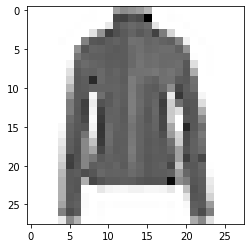

In [30]:
my_predict(1234)

In [0]:
from ipywidgets import interact_manual

In [34]:
interact_manual(my_predict, n=(0,9999))

interactive(children=(IntSlider(value=4999, description='n', max=9999), Button(description='Run Interact', sty…

<function __main__.my_predict>

In [35]:
score = model.evaluate(x_test, y_test)

313/313 [==============================] - 2s 6ms/step - loss: 0.0224 - accuracy: 0.8418


In [0]:
loss, acc = score

In [37]:
print('The true test rate is', acc )

The true test rate is 0.8417999744415283


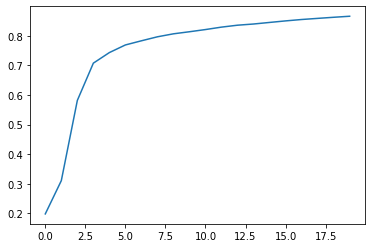

In [39]:
plt.plot(final.history['accuracy'])#正確率趨勢圖檢視